In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
df= pd.read_csv('survey_results_public.csv')
df.head()


,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [3]:
df = df[['Country','EdLevel','YearsCode','YearsCodePro','Employment','ConvertedCompYearly']]
df = df.rename({'ConvertedCompYearly':'AnnualSalary'},axis=1)
df

,Country,EdLevel,YearsCode,YearsCodePro,Employment,AnnualSalary
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Canada,NaN,NaN,NaN,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17,"Employed, full-time",215232.0
4,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,3,"Employed, full-time",NaN
...,...,...,...,...,...,...
73263,Nigeria,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,5,"Employed, full-time",NaN
73264,United States of America,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,5,"Employed, full-time",NaN
73265,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",42,33,"Employed, full-time",NaN
73266,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",50,31,"Employed, full-time",NaN


In [4]:
df = df[df['AnnualSalary'].notnull()]
df

,Country,EdLevel,YearsCode,YearsCodePro,Employment,AnnualSalary
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17,"Employed, full-time",215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,6,"Employed, full-time",49056.0
10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,2,"Employed, full-time",60307.0
11,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,10,"Employed, full-time;Independent contractor, fr...",194400.0
...,...,...,...,...,...,...
73116,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",21,16,"Employed, full-time",115000.0
73118,Nigeria,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,3,"Employed, full-time",57720.0
73119,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,1,"Employed, full-time",70000.0
73120,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,2,"Employed, full-time",35192.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38071 entries, 2 to 73121
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       38071 non-null  object 
 1   EdLevel       38054 non-null  object 
 2   YearsCode     38001 non-null  object 
 3   YearsCodePro  37935 non-null  object 
 4   Employment    38067 non-null  object 
 5   AnnualSalary  38071 non-null  float64
dtypes: float64(1), object(5)
memory usage: 2.0+ MB


In [6]:
df.isnull().sum()

Country           0
EdLevel          17
YearsCode        70
YearsCodePro    136
Employment        4
AnnualSalary      0
dtype: int64

In [7]:
# Dropping the rows where a value is not available in a column==>this is quite a radical way
# Alternatively you can replace the missing values with the mean of each column
# E.G df['EdLevel'] = df['EdLevel'].replace(0,df['EdLevel'].mean()) for "EdLevel" column
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCode       0
YearsCodePro    0
Employment      0
AnnualSalary    0
dtype: int64

In [8]:
df = df[df['Employment']=='Employed, full-time']
df = df.drop(columns=['Employment'],axis=1)
df

,Country,EdLevel,YearsCode,YearsCodePro,AnnualSalary
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,5,40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17,215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,6,49056.0
10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,2,60307.0
12,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,5,65000.0
...,...,...,...,...,...
73116,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",21,16,115000.0
73118,Nigeria,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,3,57720.0
73119,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,1,70000.0
73120,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,2,35192.0


In [9]:
df['Country'].value_counts()

United States of America                                7851
Germany                                                 2381
United Kingdom of Great Britain and Northern Ireland    2340
India                                                   1865
Canada                                                  1249
                                                        ... 
Haiti                                                      1
Zambia                                                     1
Suriname                                                   1
Somalia                                                    1
Seychelles                                                 1
Name: Country, Length: 155, dtype: int64

In [10]:
def short_cat(cat,cutoff):
    cat_map = {}
    for i in range(len(cat)):
        if cat.values[i] >= cutoff:
            cat_map[cat.index[i]] = cat.index[i]
        else:
            cat_map[cat.index[i]] = 'Others'
    return cat_map
            
            

In [11]:
country_map = short_cat(df.Country.value_counts(),400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Others                                                  8635
United States of America                                7851
Germany                                                 2381
United Kingdom of Great Britain and Northern Ireland    2340
India                                                   1865
Canada                                                  1249
France                                                  1124
Brazil                                                  1011
Spain                                                    857
Netherlands                                              700
Australia                                                699
Italy                                                    666
Poland                                                   572
Sweden                                                   560
Russian Federation                                       424
Switzerland                                              416
Name: Country, dtype: in

<AxesSubplot:title={'center':'AnnualSalary($) vs Country'}, xlabel='Country', ylabel='AnnualSalary'>

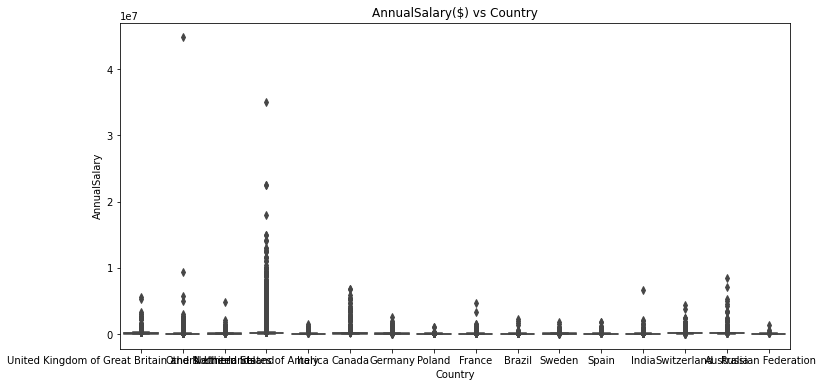

In [12]:
plt.figure(figsize=(12,6))
plt.title('AnnualSalary($) vs Country')

sns.boxplot(data=df,x='Country',y='AnnualSalary')
# Boxplot shows a lot of outliers, this is not good for fitting our model

In [13]:
# Lets trim it down to salary range between 250000 and 10000
df = df[(df['AnnualSalary'] <= 250000) & (df['AnnualSalary']>= 10000)]
df

,Country,EdLevel,YearsCode,YearsCodePro,AnnualSalary
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,5,40205.0
3,Others,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17,215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,6,49056.0
10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,2,60307.0
12,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,5,65000.0
...,...,...,...,...,...
73116,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",21,16,115000.0
73118,Others,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,3,57720.0
73119,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,1,70000.0
73120,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,2,35192.0


<AxesSubplot:title={'center':'AnnualSalary($) vs Country'}, xlabel='Country', ylabel='AnnualSalary'>

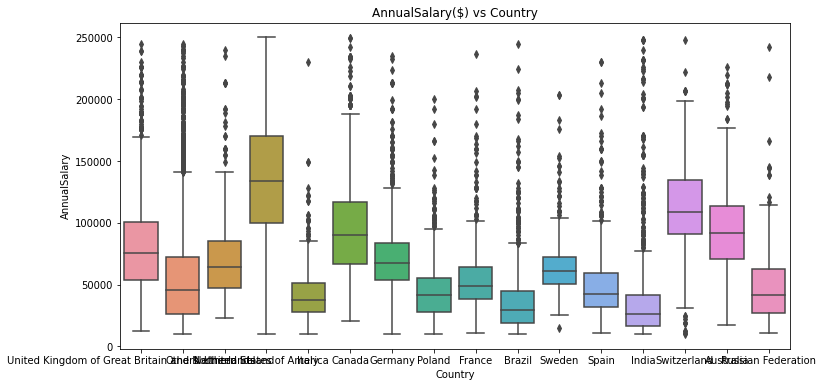

In [14]:
plt.figure(figsize=(12,6))
plt.title('AnnualSalary($) vs Country')

sns.boxplot(data=df,x='Country',y='AnnualSalary')
# box plot below gives a picture,although we still have a lot of outliers, but we have a very good 
# in the interquartile range

In [15]:
df['YearsCodePro'].unique()

array(['5', '17', '6', '2', '4', '10', '22', '20', '9', '14', '21', '15',
       '3', '25', '7', '8', '12', '19', '24', '1', '11', '23',
       'Less than 1 year', '18', '37', '46', '13', '32', '27', '28', '16',
       '31', '30', '34', '35', '26', '42', '38', '36', '40', '41', '29',
       '33', '39', '48', '45', '44', '43', 'More than 50 years', '47',
       '49', '50'], dtype=object)

In [16]:
def experience(x):
    if x== 'Less than 1 year':
        return 0.5
    if x== 'More than 50 years':
        return 50
    return float(x)

In [17]:
df.YearsCodePro = df.YearsCodePro.apply(experience)
df.YearsCodePro.unique()

C:\Users\CCRN\AppData\Local\Temp\ipykernel_17072\2452246528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.YearsCodePro = df.YearsCodePro.apply(experience)


array([ 5. , 17. ,  6. ,  2. ,  4. , 10. , 22. , 20. ,  9. , 14. , 21. ,
       15. ,  3. , 25. ,  7. ,  8. , 12. , 19. , 24. ,  1. , 11. , 23. ,
        0.5, 18. , 37. , 46. , 13. , 32. , 27. , 28. , 16. , 31. , 30. ,
       34. , 35. , 26. , 42. , 38. , 36. , 40. , 41. , 29. , 33. , 39. ,
       48. , 45. , 44. , 43. , 50. , 47. , 49. ])

In [18]:
df.YearsCodePro.info()

<class 'pandas.core.series.Series'>
Int64Index: 27051 entries, 2 to 73121
Series name: YearsCodePro
Non-Null Count  Dtype  
--------------  -----  
27051 non-null  float64
dtypes: float64(1)
memory usage: 422.7 KB


In [19]:
df.YearsCode = df.YearsCode.apply(experience)
df.YearsCode.unique()

C:\Users\CCRN\AppData\Local\Temp\ipykernel_17072\1419120494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.YearsCode = df.YearsCode.apply(experience)


array([14. , 20. ,  6. ,  5. , 12. ,  7. , 13. , 36. , 25. , 16. , 10. ,
       24. ,  3. , 40. , 15. ,  9. ,  8. ,  4. , 17. , 18. , 29. , 30. ,
       11. , 22. , 32. , 26. , 28. , 19. , 23. , 43. , 48. , 38. , 21. ,
       27. ,  0.5, 37. , 31. , 35. , 39. ,  1. ,  2. , 42. , 34. , 46. ,
       45. , 33. , 41. , 44. , 50. , 47. , 49. ])

In [20]:
df.EdLevel.unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else', 'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'], dtype=object)

In [21]:
def education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral degree' in x:
        return 'Post grad'
    if 'Associate degree' in x:
        return 'Associate degree'
    return "Less than a Bachelor’s degree"

df.EdLevel = df.EdLevel.apply(education)

C:\Users\CCRN\AppData\Local\Temp\ipykernel_17072\3451790163.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.EdLevel = df.EdLevel.apply(education)


In [22]:
df.EdLevel.unique()

array(['Master’s degree', 'Bachelor’s degree',
       'Less than a Bachelor’s degree', 'Associate degree', 'Post grad'],
      dtype=object)

In [23]:
from sklearn.preprocessing import LabelEncoder
le_edu = LabelEncoder()
df.EdLevel = le_edu.fit_transform(df.EdLevel) 
df.EdLevel.unique()

C:\Users\CCRN\AppData\Local\Temp\ipykernel_17072\2237261803.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.EdLevel = le_edu.fit_transform(df.EdLevel)


array([3, 1, 2, 0, 4])

In [24]:
le_country = LabelEncoder()
df.Country = le_country.fit_transform(df.Country) 
df.Country.unique()

C:\Users\CCRN\AppData\Local\Temp\ipykernel_17072\1005853876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Country = le_country.fit_transform(df.Country)


array([14,  8,  7, 15,  6,  2,  4,  9,  3,  1, 12, 11,  5, 13,  0, 10])

In [25]:
X = df.drop(['AnnualSalary'],axis=1)
y = df['AnnualSalary']
y

2         40205.0
3        215232.0
8         49056.0
10        60307.0
12        65000.0
           ...   
73116    115000.0
73118     57720.0
73119     70000.0
73120     35192.0
73121     75384.0
Name: AnnualSalary, Length: 27051, dtype: float64

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [95]:
#Making sure it was split into appropriate portions
print(X.shape,X_train.shape,X_test.shape)

(27051, 4) (21640, 4) (5411, 4)


In [26]:
model1 = LinearRegression()
model1.fit(X,y)

LinearRegression()

In [27]:
#Accuracy of the trained data
ypred = model1.predict(X)
ypred

array([97966.33581558, 89873.81732962, 60585.81517061, ...,
       92669.04478623, 75409.35017512, 92763.83884919])

In [28]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
error = np.sqrt(mse(y,ypred))
error

44009.91941256759

In [29]:
model2 = DecisionTreeRegressor()
model2.fit(X,y)

DecisionTreeRegressor()

In [30]:
ypred2 = model2.predict(X)
ypred2

array([65961.        , 92034.125     , 49056.        , ...,
       96394.75609756, 64033.44444444, 72870.75      ])

In [31]:
error = np.sqrt(mse(y,ypred2))
error

28180.63461416949

In [32]:
import pickle

data = {'model': model2, 'le_country': le_country, 'le_edu': le_edu}
with open('Developer_salary_model.plk', 'wb') as file:
    pickle.dump(data,file)

In [33]:
with open('Developer_salary_model.plk', 'rb') as file:
    data = pickle.load(file)
    
model2 = data['model']
le_country = data['le_country']
le_edu = data['le_edu']

In [107]:
ypred = model.predict(X_test)
ypred

array([128617.5 , 107004.75,  83182.  , ...,  41448.  ,  92780.  ,
        44790.  ])